In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression            
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [49]:
dataset = pd.read_csv(r"C:\Users\karan\OneDrive\Desktop\Ecommerse_sales_analysis\sales_clean.dataset.csv")
dataset.head()

,month,category,region,quantity,sales,profit,profit_margin
0,12,Office,North,4,3640,348.93,9.585989
1,11,Accessories,East,7,1197,106.53,8.899749
2,5,Electronics,South,5,5865,502.73,8.571697
3,3,Accessories,South,2,786,202.87,25.810432
4,9,Accessories,West,1,509,103.28,20.290766


In [50]:
dataset.shape

(3500, 7)

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          3500 non-null   int64  
 1   category       3500 non-null   object 
 2   region         3500 non-null   object 
 3   quantity       3500 non-null   int64  
 4   sales          3500 non-null   int64  
 5   profit         3500 non-null   float64
 6   profit_margin  3500 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 191.5+ KB


In [52]:
dataset.describe()

,month,quantity,sales,profit,profit_margin
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,6.512286,4.931714,3047.966000,527.047203,17.369919
std,3.447415,2.575895,2440.213237,504.139732,7.101922
min,1.000000,1.000000,51.000000,6.970000,5.004685
25%,4.000000,3.000000,1049.500000,158.695000,11.369866
50%,6.000000,5.000000,2350.500000,361.070000,17.224585
75%,10.000000,7.000000,4537.000000,729.125000,23.343222
max,12.000000,9.000000,10782.000000,2946.930000,29.995117


In [53]:
dataset.isnull().sum()

month            0
category         0
region           0
quantity         0
sales            0
profit           0
profit_margin    0
dtype: int64

In [54]:
dataset.duplicated().sum()

np.int64(0)

Text(0.5, 1.0, 'Category VS Highest Reveneu')

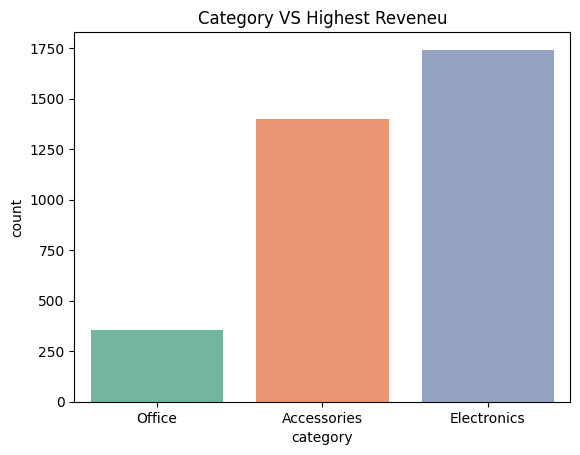

In [55]:
sns.countplot(x="category",data=dataset ,hue="category",legend=False,palette="Set2")
plt.title("Category VS Highest Reveneu")

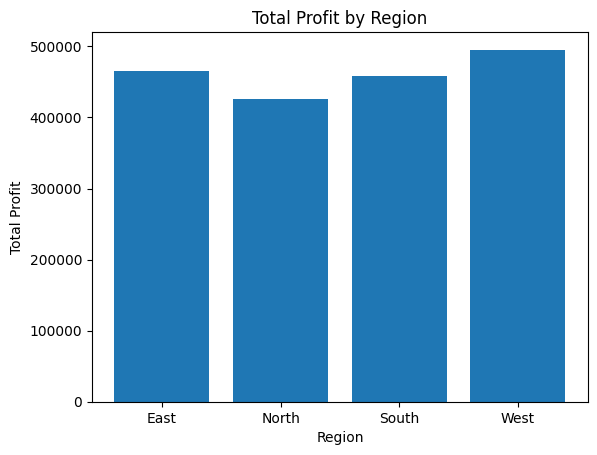

In [56]:
region_profit = dataset.groupby("region")["profit"].sum()

plt.bar(region_profit.index, region_profit.values)
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.title("Total Profit by Region")
palette="Set1"
plt.show()

<Axes: xlabel='None', ylabel='sales'>

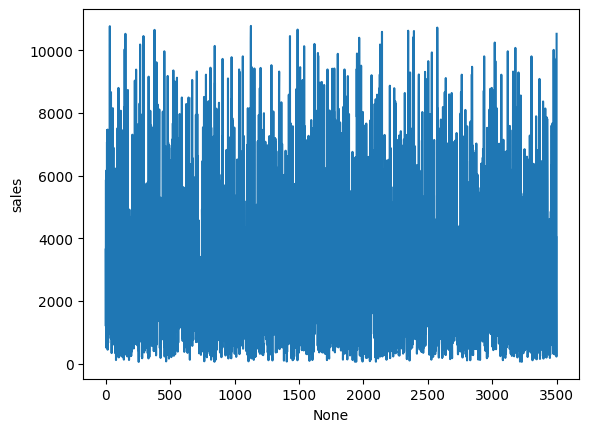

In [57]:
sns.lineplot(x=dataset.index, y="sales", data=dataset)

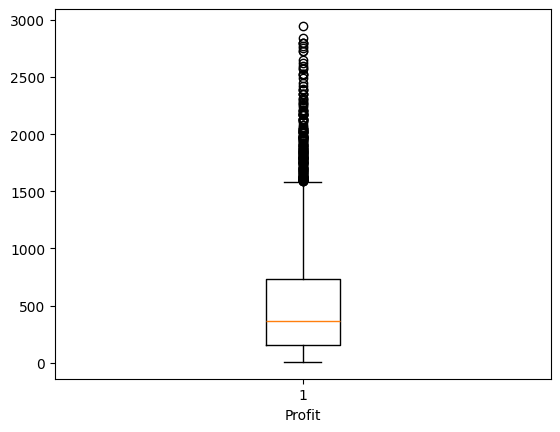

In [58]:
import matplotlib.pyplot as plt

plt.boxplot(dataset['profit'])
plt.xlabel("Profit")
plt.show()

<Axes: xlabel='sales', ylabel='profit'>

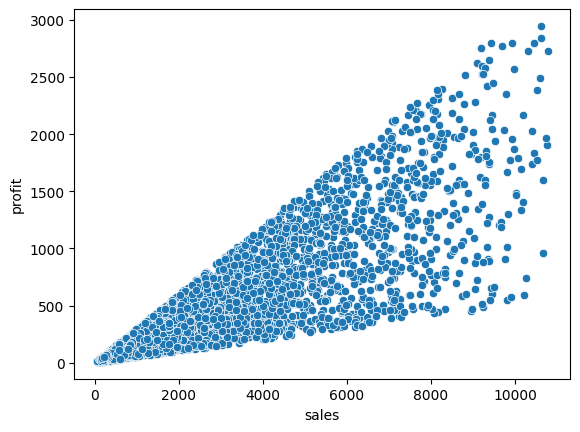

In [59]:
sns.scatterplot(x='sales', y='profit', data=dataset)

<Axes: xlabel='region', ylabel='profit'>

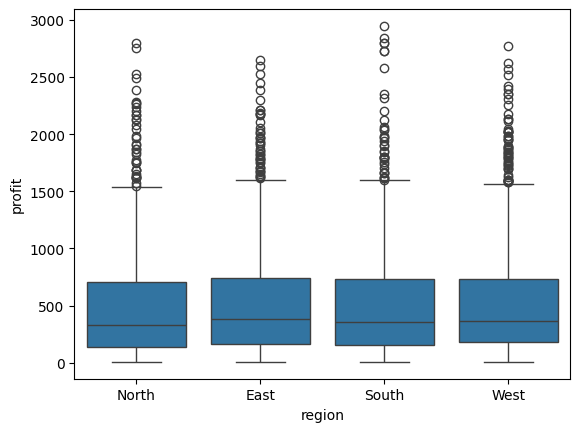

In [60]:
sns.boxplot(x='region', y='profit', data=dataset)

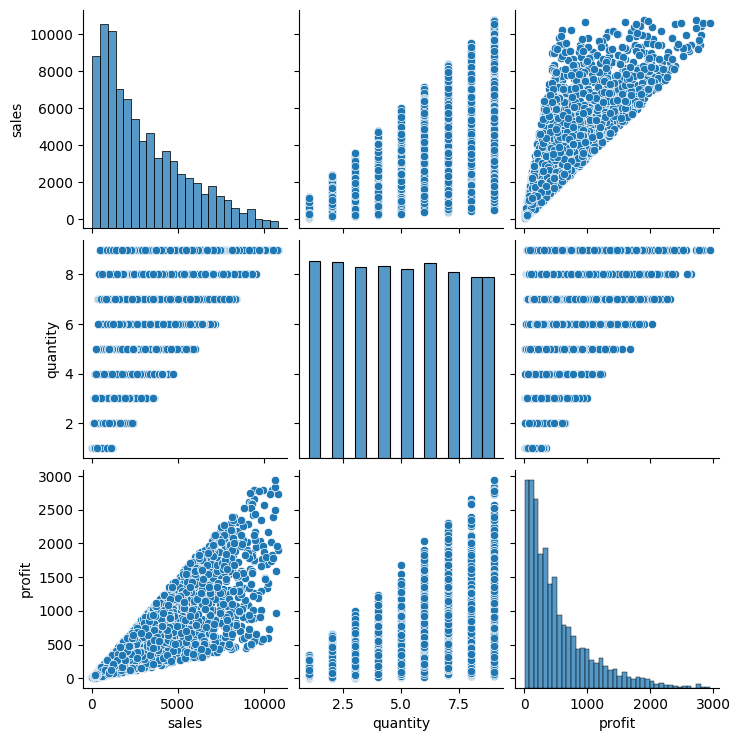

In [61]:
sns.pairplot(dataset[['sales','quantity','profit']])

<Axes: xlabel='sales'>

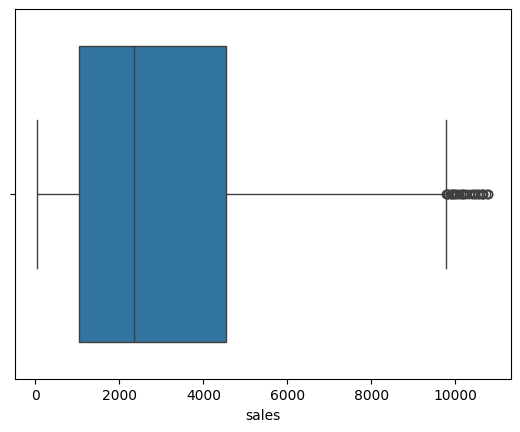

In [62]:
sns.boxplot(x=dataset['sales'])

In [63]:
# Step 1: Calculate Quartiles
Q1 = dataset['sales'].quantile(0.25)
Q3 = dataset['sales'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


outliers = dataset[
    (dataset['sales'] < lower_bound) |
    (dataset['sales'] > upper_bound)
]

print("Number of outliers:", outliers.shape[0])
outliers.head()


#Remove an outliers
dataset_clean = dataset[
    (dataset['sales'] >= lower_bound) &
    (dataset['sales'] <= upper_bound)
]

print("Original shape:", dataset.shape)
print("Cleaned shape:", dataset_clean.shape)

Q1: 1049.5
Q3: 4537.0
IQR: 3487.5
Lower Bound: -4181.75
Upper Bound: 9768.25
Number of outliers: 35
Original shape: (3500, 7)
Cleaned shape: (3465, 7)


In [64]:
Encode = pd.get_dummies(dataset[['category', 'region']])
print(Encode.head())

   category_Accessories  category_Electronics  category_Office  region_East  \
0                 False                 False             True        False   
1                  True                 False            False         True   
2                 False                  True            False        False   
3                  True                 False            False        False   
4                  True                 False            False        False   

   region_North  region_South  region_West  
0          True         False        False  
1         False         False        False  
2         False          True        False  
3         False          True        False  
4         False         False         True  


In [65]:
#Creating an feature
dataset['profit_per_unit'] = dataset['profit'] / dataset['quantity']
dataset['sales_per_unit'] = dataset['sales'] / dataset['quantity']

In [66]:
X = dataset.drop("sales", axis=1)
y = dataset["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train.dtypes

month                int64
category            object
region              object
quantity             int64
profit             float64
profit_margin      float64
profit_per_unit    float64
sales_per_unit     float64
dtype: object

In [68]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test  = pd.get_dummies(X_test, drop_first=True)

#align columns
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [69]:
#Scaling
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [70]:
model = LinearRegression()
model.fit(X_train ,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [71]:
y_pred =model.predict(X_test)

In [72]:
#Model Evaluation 
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Evaluation Results")
print("------------------------")
print("R² Score :", r2)
print("MAE      :", mae)
print("RMSE     :", rmse)

Model Evaluation Results
------------------------
R² Score : 0.9427484223105302
MAE      : 420.0192913803357
RMSE     : 599.3257694947084


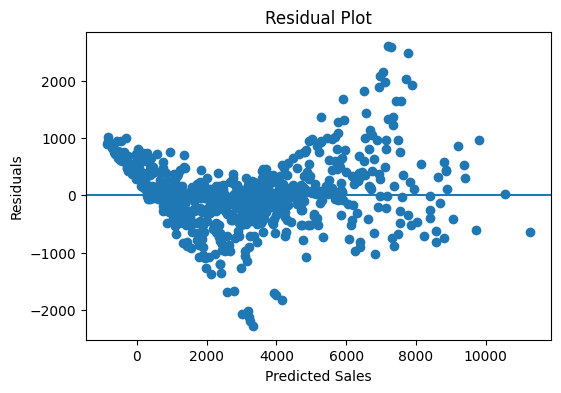

In [74]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()